## Overview

## Problem Definition
Design and build a model to help detect the medical cost of an individual.

## Evaluate
If we are able to get an accuracy score between 70 and 100 and a lower loss value between 0 and 20, then our model is ready to be shipped into production. Metrics to evaluate our model include:

* Mean Absolute Percentage Error (mape)
* Mean Absolute Error (mae)
* R squared

## Algorithms

* Machine Learning
    1. Linear Regression
    2. Random Forest Regressor
    3. Decision Tree
    4. SVM
    5. LightGBM
    6. xGBoost
    7. Ridge Regression
    8. Lassor Regression
    9. KNN
    
* Deep Learning
    2. Tensorflow

## Features
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking.
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Indivi.


## Deployment
* Cloud
    * Azure
        * Container App
        * Resource Group
        * Container App Environment
        * Managed Identity
        * Storage Account
        
    * Azure DevOps
        * Repos
        * Azure Yaml Pipelines
        * Azure Boards
* Others
    * Docker | Dockerhub
    * Terraform
    * FastAPI
    
## Steps
* Explore Dataset
* Preprocess Dataset
* Build model with ML algorithms
* Evaluate Model
* Perform Hyperparameter tuning
* Build model with tensorflow
* Select best model
* Deploy model

In [1]:
#Import additional package
!pip install lightgbm

In [2]:
## Import core libries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Import tensorflow
import tensorflow as tf

## Import scikitlearn libries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Import Machine Learning Algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
import lightgbm as lgb 

## Import Evaluation Metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Import other libries
import warnings
import zipfile
import math

#Setup warning configuration
warnings.filterwarnings("ignore")

2023-01-26 22:32:09.100715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Exploratory Data Analysis
Okay so now that we have successully import all our libries needed to explore and build our model, we are now going to begin with our first step thats to explore our dataset. By doing so, we will get to know more about our dataset such as finding missing values, checking the relationship between features and many more. Okay so without wasting much time, lets get started now.

In [3]:
#Get Dataset from azure storage account
try:
    
    ## Lets bring in our dataset now
    df=pd.read_csv("medical-cost.csv")

except:
    
    # Get incoming dataset
    !wget https://publicimages0.blob.core.windows.net/datasets/Tabular/modecal_cost/medical_cost.zip
    data=zipfile.ZipFile("medical_cost.zip")
    data.extractall()
    data.close()
    
    ## Lets bring in our dataset now
    df=pd.read_csv("medical-cost.csv")
    

In [4]:
## Display first five(5) rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
## Check total number of features and labels
df.shape

(1338, 7)

In [6]:
## Let's check for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
## Check for feature data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
## Place all categorical features in cat_features variable and numeric features into num_features
cat_features=df.select_dtypes(include=["object", "category"]).columns
num_features=df.select_dtypes(exclude=["object", "category"]).columns

In [9]:
## Lets disply both numeric and categorical features
print(f"\nNumeric Features: {num_features}\n")
print(f"Categorical Features: {cat_features}\n")


Numeric Features: Index(['age', 'bmi', 'children', 'charges'], dtype='object')

Categorical Features: Index(['sex', 'smoker', 'region'], dtype='object')



In [10]:
## Display our dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
"""
Okay so let us now check between male and female who had more medical issues
using frequency table
"""
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

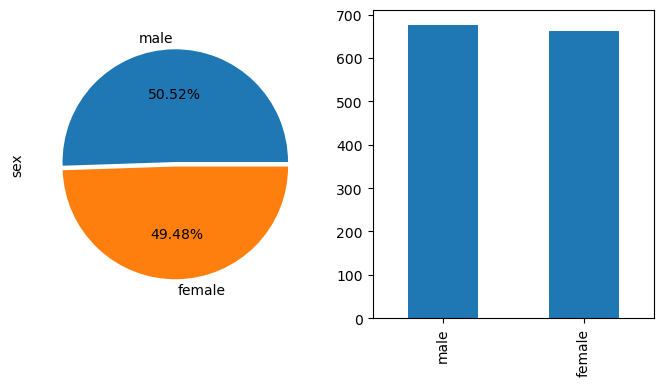

In [12]:
"""
Okay so let us now visualize those who had more medical issue i.e
either male or femals
"""

## Configure plot view size
plt.figure(figsize=(8,4))

## Visualize using pie chart
plt.subplot(1,2,1)
df.sex.value_counts().plot(kind="pie", autopct="%.2f%%", explode=[0.02,0.02])

plt.subplot(1,2,2)
df.sex.value_counts().plot(kind="bar")
plt.show()

### Observation (1):
Okay so from what we have been doing soo far, we can see that:
1. Non of our features contain null values.
2. The dataset contain both numerical and categorical features but there are more numeric features than categorical features.
3. Also, patients who had more medical issues were all males.

Okay so we will now continue to explore our datasets by comparing them to each other to see their relationship and how they relate to each other. So without wasting much time, lets get continue now.

In [13]:
## Display dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
"""
Okay so now we have to check the total number of male and female
who smoked and those who didn't and also visualize our results
"""
pd.crosstab(df.sex, df.smoker)

smoker,no,yes
sex,,
female,547,115
male,517,159


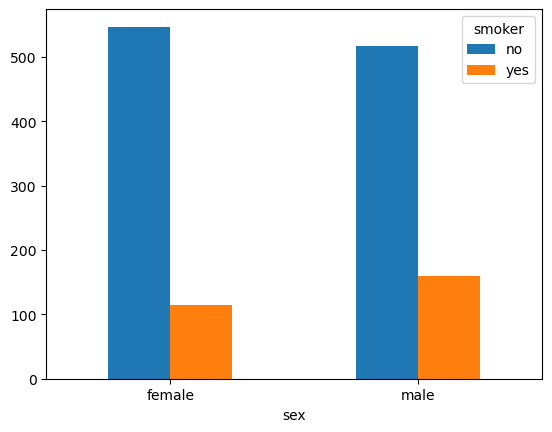

In [15]:
## Visualize above results
pd.crosstab(df.sex, df.smoker).plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

In [16]:
## Display our datasets
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
"""
Okay so lets check the total number of thos who smoke
in each region
"""
pd.crosstab(df.region, df.smoker)

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


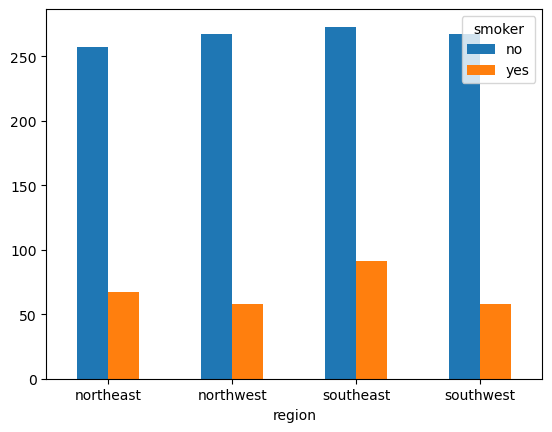

In [18]:
## Lets visualize above results
pd.crosstab(df.region, df.smoker).plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

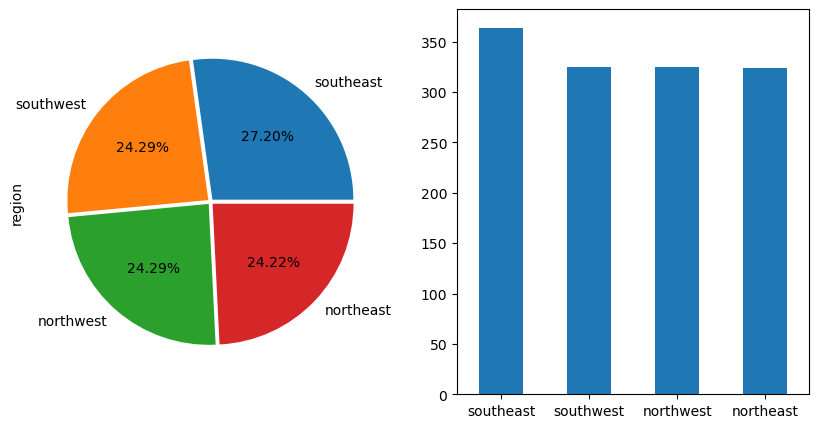

In [19]:
## Which region contains more people

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.region.value_counts().plot(kind="pie", autopct="%.2f%%", explode=[0.02,0.02,0.02,0.02])

plt.subplot(1,2,2)
df.region.value_counts().plot(kind="bar")
plt.xticks(rotation=0)

plt.show()

In [20]:
## Display dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


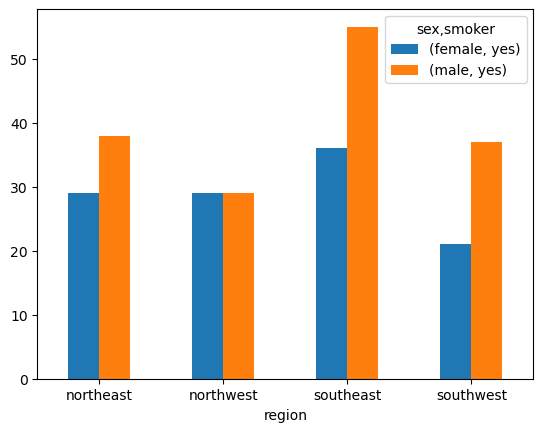

In [21]:
# Compare male and femal to see those who smoked alort in each region
pd.crosstab(columns=[df.sex, df[df.smoker=="yes"].smoker], index=df.region).plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

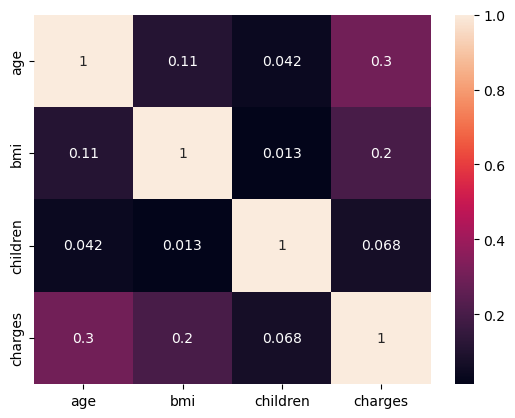

In [22]:
## Lets see how our numeric features are closer to each other using correlation
sns.heatmap(df[num_features].corr(), annot=True)
plt.show()

In [23]:
## Display dataset
df[num_features].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### Observation (2)
Okay so from what we've been doing soo far, we can see that:
1. In our dataset, with both Males and Females, those who smoked are less than those who didn't.
2. In northeast those who didn't smoke are more than those who smoked.
3. In northwest, those who didn't smoke are more that those who smoked.
4. In southeast, those who didn't smoke are more that those who smoked.
5. In sourhwest, those who did'nt smoke are more than those who smoked.
6. The region which contains more people with medical charges are as follows:
    1. South East
    2. North West and South West are equal
    3. North East
7. In northeast, male smokers were more than female smokers.
8. In northwest, the total number of males and females who smoked are equal.
9. In southeast, male smokers were more than female smoker.
10. In southwest, male smokers where more than female smokers.
11. Our dataset are not highly correlated to each other.

Okay so lets continue by checking the distribution of our datasets and also drawing a box plot.

In [24]:
#Display datasets
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
#Display numeric data using the feature names we generated
df[num_features].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


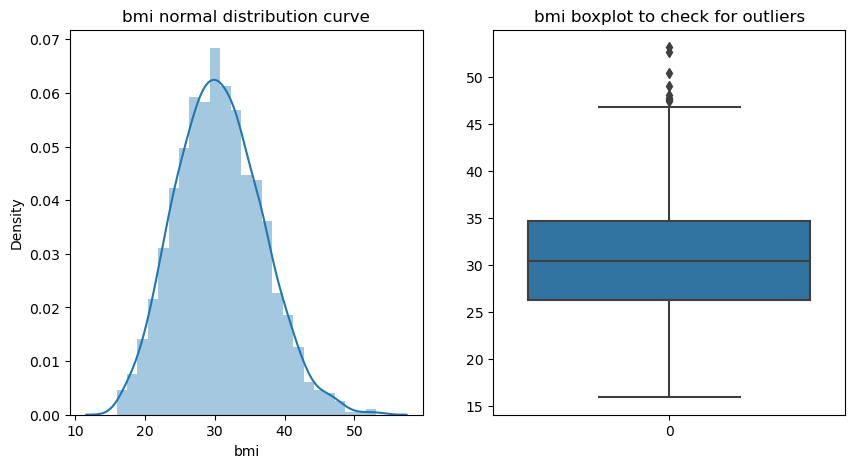

In [26]:
## Check bmi distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df.bmi)
plt.title("bmi normal distribution curve")

#Check for childrens 
plt.subplot(1, 2, 2)
sns.boxplot(df.bmi)
plt.title("bmi boxplot to check for outliers")

plt.show()

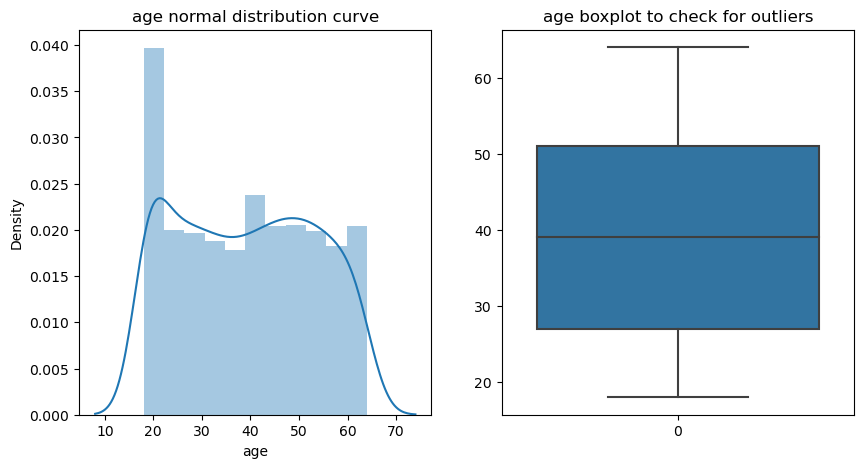

In [27]:
## Check bmi distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df.age)
plt.title("age normal distribution curve")

#Check for childrens 
plt.subplot(1, 2, 2)
sns.boxplot(df.age)
plt.title("age boxplot to check for outliers")

plt.show()

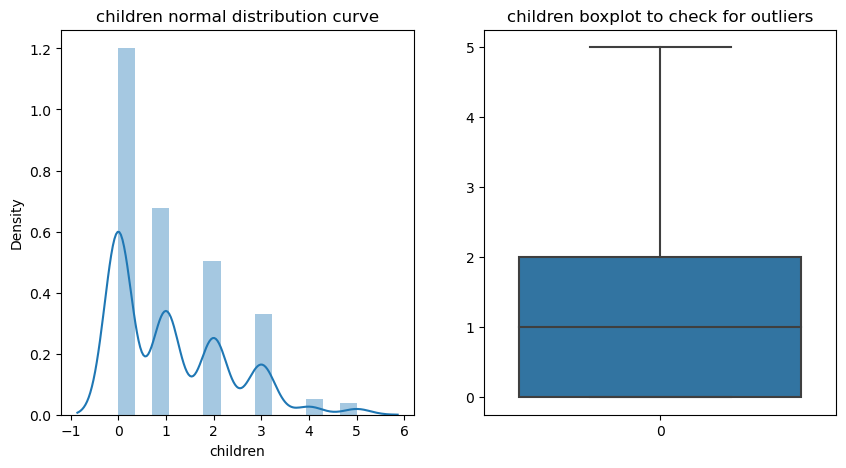

In [28]:
## Check bmi distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df.children)
plt.title("children normal distribution curve")

#Check for childrens 
plt.subplot(1, 2, 2)
sns.boxplot(df.children)
plt.title("children boxplot to check for outliers")

plt.show()

### Observation (3)
From above, we can see that:
1. bmi is has outliers in them.
2. bmi is also a normally distributed feature.

In [29]:
#Describe our datasets
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Preprocessing Our Datasets
Okay so we have successfully explore our dataset and gained more insight from it. Now, we are going to start preprocessing our datasets. We are going to convert all the categorical features into numerical features and also scale our dataset to be in one scale. So, without wasting much time, lets get started but before we even start, lets split our dataset into training and test dataset.

In [30]:
#Make a copy of our datasets
df_copy=df.copy()

#Display datasets
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
#Split dataset into features and labels
x=df_copy.drop("charges", axis=1)
y=df_copy["charges"]

In [32]:
#Split dataset into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=45,
                                                    shuffle=True)

In [33]:
#Check splited dataset sizes
print(f"y_train dataset: {y_train.shape}")
print(f"x_train datset: {x_train.shape}")
print(f"x_test dataset: {x_test.shape}")
print(f"y_test dataset: {y_test.shape}")

y_train dataset: (1070,)
x_train datset: (1070, 6)
x_test dataset: (268, 6)
y_test dataset: (268,)


## Preprocess Datasets

Okay so now that we are done exploring our datasets, its time to preprocess it now. We are going to create a class to perform this task. Bellow are what we will be doing to preprocess our datasets:

* Deal with outliers.
* Convert Categorical or Object features to numeric.
* Scale numeric datasets

### Dealing with outliers.
Some common ways of dealing with outliers are as follows:
1. Removing them
2. Reducing max values
* Capping
  * zscore -- If feature is normally distributed
  * IQR -- If feature is not normally distributed
 
* Triming
  * zscore -- If feature is normally distributed
  * IQR -- If feature is not normally distributed
  
3. Reducing min values
* Capping
  * zscore -- If feature is normally distributed
  * IQR -- If feature is not normally distributed
 
* Triming
  * zscore -- If feature is normally distributed
  * IQR -- If feature is not normally distributed
  
Since bmi feature is normally distributed, we will be using z-score capping method deal with the outliers in it. So without wasting much time, let's get started now.

In [34]:
#Deal with outliers
class CapeOutliers:
    
    @classmethod
    def ZScoreCapping(self, col, thr, dataset):
        
        #Make a copy of dataset
        new_dataset = dataset.copy()
        
        #Perform capping
        mean = new_dataset[col].mean()
        std = new_dataset[col].std()
        
        upper_bound = mean + thr*std
        lower_bound = mean - thr*std
        
        new_dataset[col] = np.where(new_dataset[col]>upper_bound, upper_bound,
                np.where(new_dataset[col]<lower_bound, lower_bound, new_dataset[col]))
        
        return new_dataset

In [35]:
#handle outlier in dataset
x_train_bmi=CapeOutliers.ZScoreCapping("bmi", 3, x_train)
x_test_bmi=CapeOutliers.ZScoreCapping("bmi", 3, x_test)

#Describe Results
x_train_bmi.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1070.0,38.852336,14.133755,18.00,26.00,39.00,51.0,64.000000
bmi,1070.0,30.574284,6.054169,15.96,26.22,30.23,34.4,48.834732
children,1070.0,1.063551,1.204792,0.00,0.00,1.00,2.0,5.000000


In [36]:
#Describe original dataset
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1070.0,38.852336,14.133755,18.00,26.00,39.00,51.0,64.00
bmi,1070.0,30.583243,6.083830,15.96,26.22,30.23,34.4,53.13
children,1070.0,1.063551,1.204792,0.00,0.00,1.00,2.0,5.00


In [37]:
#Describe x_test bmi
x_test_bmi.describe().T

,count,mean,std,min,25%,50%,75%,max
age,268.0,40.623134,13.644351,18.000,29.00,41.5,52.00000,64.00
bmi,268.0,30.983414,6.156206,18.335,26.55,30.8,35.55375,49.06
children,268.0,1.220149,1.202387,0.000,0.00,1.0,2.00000,5.00


In [38]:
#Describe x_test
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,268.0,40.623134,13.644351,18.000,29.00,41.5,52.00000,64.00
bmi,268.0,30.983414,6.156206,18.335,26.55,30.8,35.55375,49.06
children,268.0,1.220149,1.202387,0.000,0.00,1.0,2.00000,5.00


From above, comparing the max value of `x_train_bmi` with `x_train`, we can see that the max value has decreased.

So now that we have successfully dealt with outliears in our dataset, we are now going to convert our categorical features into numeric and scale our dataset as well so lets get started now.

#### Scalling

There are many techniques to perform feature scaling. But how do we know which scaling technique to use? Well thats very simple:

1. If your dataset is normally distributed use: `StandardScaler`
2. If your dataset is not normally distributed, use any of the following:
    * RobustScaler
    * MinMaxScaler
    * MaxAbsScaler
    
In our case, we will be using `StandardScaler` to scale `bmi` feature and use `MinMaxScaler` for other features.

**Note:** Ther are also more additional scaling techniques out there.


In [39]:
#Display datasets
x_train_bmi.head()

,age,sex,bmi,children,smoker,region
1075,32,female,29.59,1,no,southeast
761,23,male,35.20,1,no,southwest
6,46,female,33.44,1,no,southeast
1171,43,female,26.70,2,yes,southwest
127,52,female,37.40,0,no,southwest


In [40]:
#Onehot encode categorical features
_onehot = Pipeline([("one-hot-encode", OneHotEncoder(sparse=False))])

#Scale BMI using Standard Scaler
_scale_bmi = Pipeline([("scale-bmi", StandardScaler())])        

#Scale Children using MinMaxScaler
_scale_children = Pipeline([("scale-children", MinMaxScaler())])

#Scale Age using MinMaxScaler
_scale_age = Pipeline([("scale-age", MinMaxScaler())])

# Intialize column transformer
col = ColumnTransformer([
    ("onehot-pipeline", _onehot, ["region","smoker","sex"]),
    ("children-pipeline", _scale_children, ["children"]),
    ("bmi-pipeline", _scale_bmi, ["bmi"]),
    ("age-pipeline", _scale_age, ["age"])
], remainder="passthrough")


In [41]:
#Fit and transform on train and test dataset
p_xtrain = col.fit_transform(x_train_bmi)
p_xtest = col.transform(x_test_bmi)

In [42]:
#Display onehot encoded x_train dataset
p_xtrain

array([[ 0.        ,  0.        ,  1.        , ...,  0.2       ,
        -0.16265561,  0.30434783],
       [ 0.        ,  0.        ,  0.        , ...,  0.2       ,
         0.76441186,  0.10869565],
       [ 0.        ,  0.        ,  1.        , ...,  0.2       ,
         0.47356716,  0.60869565],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.14343019,  0.89130435],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.75614923,  0.02173913],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -1.15912919,  0.34782609]])

In [43]:
#Display onehot encoded x_test
p_xtest

array([[ 0.        ,  1.        ,  0.        , ...,  0.2       ,
        -0.37417902,  0.08695652],
       [ 0.        ,  0.        ,  1.        , ...,  0.4       ,
        -0.12630002,  0.56521739],
       [ 0.        ,  1.        ,  0.        , ...,  0.6       ,
         0.12818909,  0.91304348],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.4       ,
         0.87347862,  0.36956522],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.43697503,  0.26086957],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.92116535,  0.95652174]])

In [44]:
#Convert p_xtrain and p_xtest into a dataframe
xtrain_data = pd.DataFrame(p_xtrain, columns=['x0_northeast', 
                                              'x0_northwest', 
                                              'x0_southeast', 
                                              'x0_southwest',
                                              'x1_no', 
                                              'x1_yes', 
                                              'x2_female', 
                                              'x2_male',
                                              'children',
                                              'age', 
                                              'bmi'])

xtest_data = pd.DataFrame(p_xtest, columns=['x0_northeast', 
                                              'x0_northwest', 
                                              'x0_southeast', 
                                              'x0_southwest',
                                              'x1_no', 
                                              'x1_yes', 
                                              'x2_female', 
                                              'x2_male',
                                              'children',
                                              'age', 
                                              'bmi'])

In [45]:
#Display final xtrain results after preprocessing
xtrain_data.head()

,x0_northeast,x0_northwest,x0_southeast,x0_southwest,x1_no,x1_yes,x2_female,x2_male,children,age,bmi
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.2,-0.162656,0.304348
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.2,0.764412,0.108696
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.2,0.473567,0.608696
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.4,-0.640236,0.543478
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.127968,0.739130


In [46]:
#Display final xtest results after preprocessing
xtest_data.head()

,x0_northeast,x0_northwest,x0_southeast,x0_southwest,x1_no,x1_yes,x2_female,x2_male,children,age,bmi
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2,-0.374179,0.086957
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.4,-0.126300,0.565217
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.6,0.128189,0.913043
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.818945,0.021739
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2,0.583460,0.413043


## Build Model
Okay so we are going to start building our model. We will try to perform different experiment using diffrent machine learning algorithms. The following are the algorithms that we are going to use:

1. Linear Regression
2. Random Forest Regressor
3. Decision Tree
4. SVM
5. LightGBM
6. xGBoost
7. Ridge Regression
8. Lassor Regression
9. KNN

We are goiing to use python loop to loop though different machine learning algorithms, train our model and select the one which performes very well out of it. So without wasting much time, lets get started.

In [47]:
# Put model algorithms into a dictionary
ml_algorithms = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "LinearRegression": LinearRegression(),
    "lgb": lgb.LGBMRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR()
}

In [48]:
#Dislay algorithms in dictionary
ml_algorithms

{'RandomForestRegressor': RandomForestRegressor(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'KNeighborsRegressor': KNeighborsRegressor(),
 'LinearRegression': LinearRegression(),
 'lgb': LGBMRegressor(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'SVR': SVR()}

In [62]:
#Build class to build and evaluate our models
class BuildAndEvaluateBaseModel:
    
    #Define class variables
    ypred_values= {}
    r_squared = {}
    mape = {}
    mae = {}

    @classmethod
    def build_model(cls, xtrain, xtest, ytrain, ytest, algorithms):
        
        """
        This function will be used to build our machine learning
        models. Make prediction and also to evaluate our models.
        Args:
            xtrain: training datasets
            xtest: test datasets
            ytrain: training label
            ytest: test label
            algorithms: List of machine leanring algorithms
        """
    
        #Define a loop to build, test and evaluate our model
        for index, alg in algorithms.items():

            # Fit model
            train_model = alg.fit(xtrain, ytrain)

            # Make prediction
            ypred = train_model.predict(xtest)
            cls.ypred_values[index] = ypred
            
            #Evaluate model
            
            #Evaluate mean absolute error
            cls.mae[index] = [round(mean_absolute_error(y_true=ytest, y_pred=ypred),3)]
                
            #Evaluate mean absolute percentage error
            cls.mape[index] = [round(mean_absolute_percentage_error(y_true=ytest,y_pred=ypred),3)]
            
            #Evaluate r2
            cls.r_squared[index] = [round(r2_score(y_true=ytest, y_pred=ypred), 3)]
        
        return cls.ypred_values, cls.mae, cls.mape, cls.r_squared
    
    @staticmethod
    def evaluate_model(ypred, ytest):
        
        """
        This method is suppose to evaluate our models
        and return its results.
        Args:
            ypred: The predicted values
            ytest: The actual test value
        """
        #Evaluate mean absolute error
        mae = mean_absolute_error(y_true=ytest, y_pred=ypred)
        
        #Evaluate mean squared error
        mse = mean_squared_error(y_true=ytest, y_pred=ypred)
        
        #Evaluate mean absolute percentage error
        mape = mean_absolute_percentage_error(y_true=ytest,y_pred=ypred)
        
        #Evaluate r2
        r_squared = r2_score(y_true=ytest, y_pred=ypred)
        
        #Return results
        return mae, mse, mape, r_squared

In [63]:
#set Random Seed
np.random.seed(42)

#Call function to buils and make prediction
ypred_values, mae, mape, r_squared = BuildAndEvaluateBaseModel.build_model(xtrain=xtrain_data,
                                                                                xtest=xtest_data,
                                                                                ytrain=y_train,
                                                                                ytest=y_test,
                                                                                algorithms=ml_algorithms)

In [64]:
#Display our our mean absolute error
mae

{'RandomForestRegressor': [2740.39],
 'DecisionTreeRegressor': [3329.762],
 'KNeighborsRegressor': [3392.823],
 'LinearRegression': [4439.631],
 'lgb': [2854.444],
 'Ridge': [4443.001],
 'Lasso': [4439.069],
 'SVR': [7743.029]}

In [65]:
#Display mean absolute percentage error
mape

{'RandomForestRegressor': [0.294],
 'DecisionTreeRegressor': [0.369],
 'KNeighborsRegressor': [0.391],
 'LinearRegression': [0.423],
 'lgb': [0.302],
 'Ridge': [0.425],
 'Lasso': [0.423],
 'SVR': [0.867]}

In [66]:
#Display r2
r_squared

{'RandomForestRegressor': [0.821],
 'DecisionTreeRegressor': [0.638],
 'KNeighborsRegressor': [0.775],
 'LinearRegression': [0.703],
 'lgb': [0.821],
 'Ridge': [0.704],
 'Lasso': [0.703],
 'SVR': [-0.103]}

Okay so lets create a dataframe out from our evaluation metrics and visualize this results for us to make a better decision on the models to select for us to perform hyperparameter tuning on them. So lets get started without wasting much time....

In [67]:
#Create Dataframe from evaluation metrics except mse
df_1 = pd.concat([
    pd.DataFrame(mae, index=["mae"]),
    pd.DataFrame(mape, index=['mape']),
    pd.DataFrame(r_squared, index=["R2"])
])

In [68]:
#Display results
df_1.T

,mae,mape,R2
RandomForestRegressor,2740.390,0.294,0.821
DecisionTreeRegressor,3329.762,0.369,0.638
KNeighborsRegressor,3392.823,0.391,0.775
LinearRegression,4439.631,0.423,0.703
lgb,2854.444,0.302,0.821
Ridge,4443.001,0.425,0.704
Lasso,4439.069,0.423,0.703
SVR,7743.029,0.867,-0.103


### Observation
From above, we can see model which is performing well in terms of accuracy is `RandomForestRegressor` follow by `DecisionTreeRegressor` and so on. We can also see that the distance between the `r2` score are not that far away from each other except the model built using `SVR`.

We are going to perform hyper parameter tuning on all the models built except `SVR`. We will be using `RandomSearchCV` and `GridSearchCV` with the help of pipelines in scikitlearn. So, without wasting much time, lets get started now.

In [ ]:
# Define 